# Creating Customer Segments

In this project you, will analyze a dataset containing annual spending amounts for internal structure, to understand the variation in the different types of customers that a wholesale distributor interacts with.

Instructions:

- Run each code block below by pressing **Shift+Enter**, making sure to implement any steps marked with a TODO.
- Answer each question in the space provided by editing the blocks labeled "Answer:".
- When you are done, submit the completed notebook (.ipynb) with all code blocks executed, as well as a .pdf version (File > Download as).

In [1]:
# Import libraries: NumPy, pandas, matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Tell iPython to include plots inline in the notebook
%matplotlib inline

# Read dataset
data = pd.read_csv("wholesale-customers.csv")
print "Dataset has {} rows, {} columns".format(*data.shape)
print data.head()  # print the first 5 rows

Dataset has 440 rows, 6 columns
   Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0  12669  9656     7561     214              2674          1338
1   7057  9810     9568    1762              3293          1776
2   6353  8808     7684    2405              3516          7844
3  13265  1196     4221    6404               507          1788
4  22615  5410     7198    3915              1777          5185


##Feature Transformation

**1)** In this section you will be using PCA and ICA to start to understand the structure of the data. Before doing any computations, what do you think will show up in your computations? List one or two ideas for what might show up as the first PCA dimensions, or what type of vectors will show up as ICA dimensions.

Answer: 

PCA:
By looking at the first five rows of the provided dataset, it appears the the feature with the most influence will be the same as the feature with the highest average spend and highest standard deviation, which in this case is the "Fresh" category. It appears, therefore, that the first PCA dimension will be most heavily influenced by the "Fresh" features.

ICA:
Intuitively, if ICA returns anything useful, it will return correlations between product segments and customer purchasing behavior. Whether those correltions be direct or inverse, it seems reasonable to assume that there could be a situation where purchasing behavior arises that has strong correlations between two or more product segments.



Variance Ratio Contribution and Percent Increase By Component 
Component 1 - Variance Ratio Total: 45.961% | Percentage increase: inf%
Component 2 - Variance Ratio Total: 86.479% | Percentage increase: 88.155%
Component 3 - Variance Ratio Total: 93.482% | Percentage increase: 8.098%
Component 4 - Variance Ratio Total: 97.884% | Percentage increase: 4.709%
Component 5 - Variance Ratio Total: 99.386% | Percentage increase: 1.535%
Component 6 - Variance Ratio Total: 100.0% | Percentage increase: 0.618%


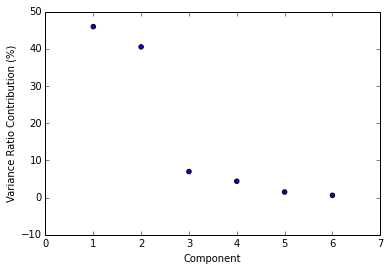

[[-0.97653685 -0.12118407 -0.06154039 -0.15236462  0.00705417 -0.06810471]
 [-0.11061386  0.51580216  0.76460638 -0.01872345  0.36535076  0.05707921]
 [-0.17855726  0.50988675 -0.27578088  0.71420037 -0.20440987  0.28321747]
 [-0.04187648 -0.64564047  0.37546049  0.64629232  0.14938013 -0.02039579]
 [ 0.015986    0.20323566 -0.1602915   0.22018612  0.20793016 -0.91707659]
 [-0.01576316  0.03349187  0.41093894 -0.01328898 -0.87128428 -0.26541687]]
[ 0.45961362  0.40517227  0.07003008  0.04402344  0.01502212  0.00613848]


 #################### Biplot below ################# 


PCA Component Matrix
[[-0.97653685 -0.12118407 -0.06154039 -0.15236462  0.00705417 -0.06810471]
 [-0.11061386  0.51580216  0.76460638 -0.01872345  0.36535076  0.05707921]]


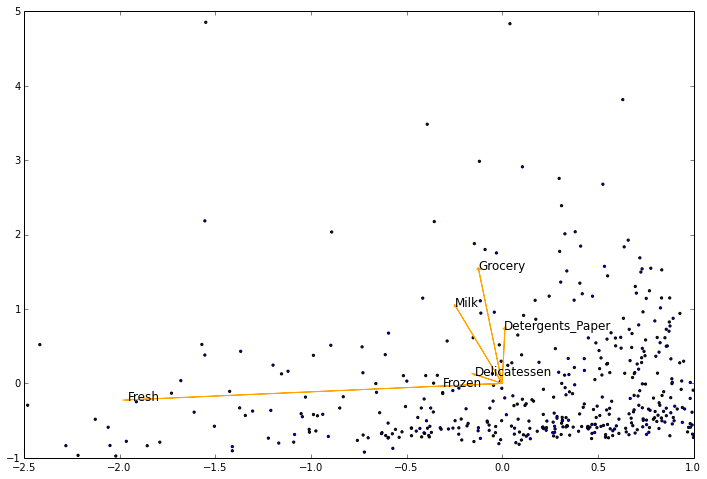

In [2]:
###PCA
# TODO: Apply PCA with the same number of dimensions as variables in the dataset


from sklearn.decomposition import PCA
pca = PCA(n_components = 6).fit(data)
comp_var = 0
i = 1
var_contribution = {}
print "Variance Ratio Contribution and Percent Increase By Component "
for variance in  pca.explained_variance_ratio_:
    prev_var = comp_var
    comp_var = comp_var+variance
    increase_per = round((comp_var-prev_var)/prev_var * 100,3)
    display_var = round(float(comp_var*100), 3)
    var_contribution[i] = variance*100
    print "Component " + str(i) + " - " + "Variance Ratio Total: " + str(display_var) + "% | Percentage increase: " + str(increase_per) + "%"
    i += 1

plt.scatter(var_contribution.keys(), var_contribution.values())
plt.xlabel('Component')
plt.ylabel('Variance Ratio Contribution (%)')
plt.show()
    
# Print the components and the amount of variance in the data contained in each dimension
print pca.components_
print pca.explained_variance_ratio_


print "\n\n #################### Biplot below ################# \n\n"

# Biplot function, see reference in answer to question 3


# Code snippet taken from Udacity Forums and modified, reference link below:
# https://discussions.udacity.com/t/having-trouble-with-pca-and-ica-specifically-with-explaining-what-the-dimensions-mean/41890/11
def pca_biplot(new_data):
    # Fit on 2 components
    pca2 = PCA(n_components=2, whiten=True).fit(new_data)
    
    print "PCA Component Matrix"
    print pca2.components_
    # Plot transformed/projected data

    format_data = pd.DataFrame(
        pca2.transform(new_data),
        columns=['PC1', 'PC2']
    )
    
    plt.figure(figsize=(12, 8))
    plt.scatter(format_data["PC1"], format_data["PC2"], marker='.')
    
    plt.xlim(-2.5,1.0)
    plt.ylim(-1.0,5)
    # Plot arrows and labels
    for i, (pc1, pc2) in enumerate(zip(pca2.components_[0]*2, pca2.components_[1]*2)):
        plt.arrow(0, 0, pc1, pc2, width=0.001, fc='orange', ec='orange')
        plt.annotate(new_data.columns[i], (pc1, pc2), size=12)
    plt.show()


pca_biplot(data)


**2)** How quickly does the variance drop off by dimension? If you were to use PCA on this dataset, how many dimensions would you choose for your analysis? Why?

Answer: The variance contribution appears to be something of a step function with the majority of the contribution, 87.47% in total, coming from the first two dimensions. The next four dimensions have very small contributions that appear to be decreasing in a negative exponential fashion.

Depending upon tests for efficiency and increased accuracy, I would choose either 2 or 3 dimensions. After the third dimension each subsequent dimension contributes 3.8% or less to the total variance ratio.

Forced to pick one value without further testing, I would pick 2 dimensions, covering 86.47% of the total variance ratio.



**3)** What do the dimensions seem to represent? How can you use this information?

Answer: To answer this question I used one external resource

1) Udacity Forums - https://discussions.udacity.com/t/having-trouble-with-pca-and-ica-specifically-with-explaining-what-the-dimensions-mean/41890/11
This put me in the right direction to visualize the dimensions using the bi-plot above.

The first principle component is strongly correlated to the Fresh variable without significant contributions from any of the other five variables, suggesting that this component can be viewed as a corollary for the Fresh variable indepdendently and therefore we can view one customer segment as the "Fresh" segment.

The second principle component is correlated with the Milk, Grocery, and Detergents_Paper variables. Suggesting that these variables will rise and fall together. For instance, a cutomer who purchases a large volume of Grocery products is also likely to purchase proportional quantities of Milk and Detergents_paper products. This could be interpreted as a second customer segment. Without proceeding further with analysis we could create from this principle component a cutomer segment for "Milk, Grocery and Detergents_paper". 

In the scope of this project we are really using component analysis for variable reduction before proceeding with clustering techniques, however these components can inform future analysis by defining a split from one set of customers (the original data set) into two customer segments. 

###ICA

In [3]:
# TODO: Fit an ICA model to the data
# Note: Adjust the data to have center at the origin first!
from sklearn.decomposition import FastICA
std_data = data
std_data /= std_data.std(axis=0)


# Print the independent components

In [4]:
ica = FastICA(n_components=6, whiten=True, random_state=1).fit(std_data)
print np.round_(ica.components_*100, decimals=6)
i= i+1


[[ -0.378285   1.706305  11.449306  -0.710476 -13.447288  -1.616171]
 [  5.028557  -0.634537  -0.596982  -0.328714   0.986717  -0.293653]
 [  1.094202   0.103737  -0.735541  -5.411116   0.264372   1.67857 ]
 [ -0.194467  -7.265768   5.523056   0.176477  -1.583465   1.708009]
 [ -0.488784  -0.16203   -0.570511  -0.253454   0.243066   5.102253]
 [ -0.265832   1.389674  -6.125668  -0.198406   0.406229   0.412681]]


**4)** For each vector in the ICA decomposition, write a sentence or two explaining what sort of object or property it corresponds to. What could these components be used for?

Answer: 

Vector 1: This dimension displays a very large negative value for Detergents_Paper while also having a very large positive value for Grocery. This suggests a strong anti-correlation between customers who purchase mostly Detergents_Paper and those who purchase mostly Grocery. This could be explained by two customer segments, one dealing mostly in food-stuffs, while the other deals in non-food related items. (grocery stores, convenience stores, etc., vs. pharmacies, department stores)

Vector 2: This dimension describes customers who are heavily biased toward the Fresh category and show no other correlations to the other five categories. This dimension makes sense for describing customers that use large amounts of fresh foods independent of their other buying behaviors. One possible customer segment would be higher end restaurants who go through large quantities of fresh food on a regular basis while ordering shelf-safe or non-food items more infrequently and in less volume.

Vector 3: This dimensions describes a negative corellation between the Frozen category and the group of Delicatessen and Fresh. This is an interesting anti-correlation as all three categories are food items. This suggests that this customer segment orders Fresh and Deli items in much higher volume than frozen items and vice-versa. This could describe smaller grocery stores with more frozen foods and fewer fresh selections versus larger, more well stocked stores. This could also describe lower end restaurants and fast food restaurants who receive a large portion of their items frozen.

Vector 4: A large negative value for Milk and a proportionally large positive value for Grocery defines this dimension. This suggests anti-correlative relationship between customers purchasing large quantities of one or the other. This could be described as convenience stores selling basic necessity items such as Milk, and full service grocery stores selling large quantities of shelved goods.

Vector 5: Not discussed

Vector 6: Not discussed

##Clustering

In this section you will choose either K Means clustering or Gaussian Mixed Models clustering, which implements expectation-maximization. Then you will sample elements from the clusters to understand their significance.

###Choose a Cluster Type

**5)** What are the advantages of using K Means clustering or Gaussian Mixture Models?

Answer: 


K-Means clustering:<br>
1) A general purpose algorithm that scales easily to large sets of data.<br>
2) The run time of K-Means is linear, represented as the operation time times the number of objects O(n) <br>
3) K-Means is a hard clustering method. It absolutely assigns a data point to a cluster on each iteration of the algorithm. This is opposed to soft clustering discussed within GMM
4) Operates by creating clusters of equal variance

Gaussian Mixture Model:<br>
GMM operates by trying to find a given number of normally distributed groups. 

1) Is a soft clustering method which means data points can be assigned to multiple clusters with a probability. Unlike hard clustering where the algorithm says a data point belongs 100% to a cluster, GMM can assign a point with 80% confidence to one cluster and 20% confidence to another (for example). <br>
2) Operates by assuming that there are N clusters of gaussian distribution within the parent data.<br>


It appears that the distribution of the data would make it a poor choice for K-Means. The data does not have well defined clusters and some clusters may have to overlap to create a meaningful model. Referencing the Carnegie Mellon article below, it appears that K-Means would not be a good choice for a dataset distributed in this manner. Intuitively, it seems that K-Means could give a very inconsistent result for this data set.  For this reason I will run with the Gaussian Mixture Model
References:
http://www.cs.cmu.edu/~guestrin/Class/10701-S07/Slides/clustering.pdf
https://www.quora.com/What-are-the-pros-and-cons-of-kmeans-vs-hierarchical-clustering
https://en.wikipedia.org/wiki/Mixture_model


From the SKLearn Docs:<br>
"Gaussian mixture models, useful for clustering, are described in another chapter of the documentation dedicated to mixture models. KMeans can be seen as a special case of Gaussian mixture model with equal covariance per component."<br>

I can not find direct information on algorithm speed, however, if I use this statement, I believe I can assume that K-Means in SKLearn would be faster than GMM, but the specific computational speed of GMM I'm unsure of.

Note: The documentation for GMM is very sparse in SKLearn and the specific implementation of Expectation Maximization called Gaussian Mixture Model is, after looking through the videos and material multiple times, never directly discussed. I think in the future, providing additional resources for Mixture models could relieve quite a bit of frustration for future students.


**6)** Below is some starter code to help you visualize some cluster data. The visualization is based on [this demo](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html) from the sklearn documentation.

In [5]:
# Import clustering modules
from sklearn.cluster import KMeans
from sklearn.mixture import GMM

In [6]:
# TODO: First we reduce the data to two dimensions using PCA to capture variation
reduced_data = PCA(n_components=2, whiten=True).fit_transform(data)
print reduced_data[:10]  # print upto 10 elements

[[-0.05066239  0.13161505]
 [ 0.34502287  0.33556674]
 [ 0.37738285  0.21406486]
 [-0.07718708 -0.5212911 ]
 [-0.83067886 -0.17928035]
 [ 0.2155776  -0.07967954]
 [ 0.05576966 -0.16710073]
 [ 0.34874672  0.11866355]
 [ 0.52313722 -0.18311407]
 [ 0.37595155  1.11903068]]


In [7]:
# TODO: Implement your clustering algorithm here, and fit it to the reduced data for visualization
# The visualizer below assumes your clustering object is named 'clusters'
clusters = []
clusters.append(KMeans(n_clusters=3).fit(reduced_data))
clusters.append(KMeans(n_clusters=4).fit(reduced_data))
clusters.append(GMM(n_components=3).fit(reduced_data))
clusters.append(GMM(n_components=4).fit(reduced_data))


In [8]:
# Plot the decision boundary by building a mesh grid to populate a graph.
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
hx = (x_max-x_min)/1000.
hy = (y_max-y_min)/1000.
xx, yy = np.meshgrid(np.arange(x_min, x_max, hx), np.arange(y_min, y_max, hy))

# Obtain labels for each point in mesh. Use last trained model.
Z = []
Z.append(clusters[0].predict(np.c_[xx.ravel(), yy.ravel()]))
Z.append(clusters[1].predict(np.c_[xx.ravel(), yy.ravel()]))
Z.append(clusters[2].predict(np.c_[xx.ravel(), yy.ravel()]))
Z.append(clusters[3].predict(np.c_[xx.ravel(), yy.ravel()]))


In [9]:
# TODO: Find the centroids for KMeans or the cluster means for GMM 
centroids = []
centroids.append(clusters[0].cluster_centers_)
centroids.append(clusters[1].cluster_centers_)
centroids.append(clusters[2].means_)
centroids.append(clusters[3].means_)



[[-1.86890029 -0.36902956]
 [ 0.32398252 -0.25421161]
 [ 0.10439573  2.12063212]]


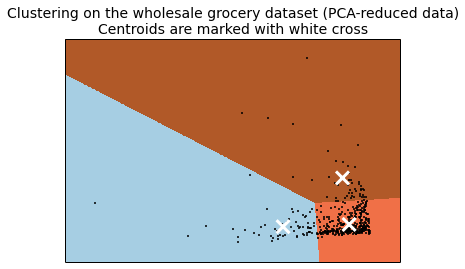

[[ 0.44511156  1.05103642]
 [-1.88774966 -0.36229652]
 [ 0.27606834 -0.40980069]
 [-1.13306214  5.12306113]]


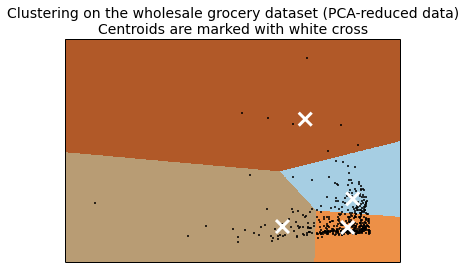

[[ 0.01634083 -0.53083776]
 [ 0.55000373  0.36751407]
 [-1.41882398  0.86916087]]


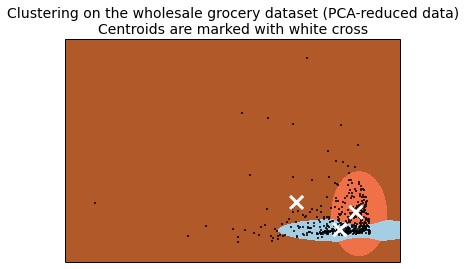

[[ 0.17943598 -0.55276369]
 [-1.22112065 -0.27636974]
 [-0.74413909  2.88204015]
 [ 0.55831999  0.45909725]]


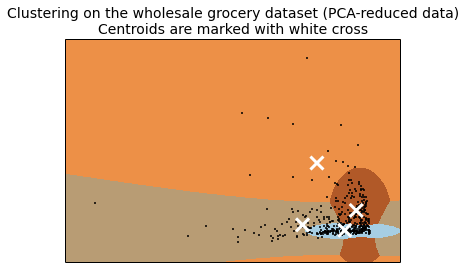

In [10]:
# Put the result into a color plot
i = 0
while i < len(Z):
    new_Z = Z[i].reshape(xx.shape)
    new_centroids = centroids[i]
    print new_centroids
    plt.figure(1)
    plt.clf()
    plt.imshow(new_Z, interpolation='nearest',
               extent=(xx.min(), xx.max(), yy.min(), yy.max()),
               cmap=plt.cm.Paired,
               aspect='auto', origin='lower')

    plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=3)
    plt.scatter(new_centroids[:, 0], new_centroids[:, 1],
                marker='x', s=169, linewidths=3,
                color='w', zorder=10)
    plt.title('Clustering on the wholesale grocery dataset (PCA-reduced data)\n'
               'Centroids are marked with white cross', fontsize=14)
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xticks(())
    plt.yticks(())
    plt.show()
    i = i+1



Percentage contributions from each variable to each component
[[ 53.546  10.632  13.876  14.528   2.373   5.044]
 [ 55.903  12.078  12.87   11.156   3.141   4.853]
 [ 17.317  24.624  34.751   3.84   15.351   4.117]
 [ 13.688  24.243  36.576   5.848  15.431   4.215]]


Total Value of each Principle Component
[  19588.04   49493.91  100962.2    32095.33]


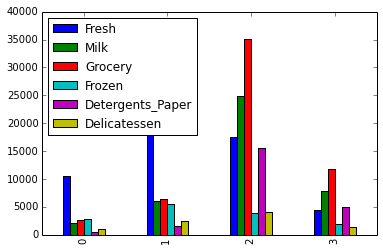

In [11]:
new_pca = PCA(n_components=2, whiten=True).fit(data)
sixD_centroid = new_pca.inverse_transform(centroids[3])
contributions = [[],[],[],[]]
total_value = []
i = 0
for x in sixD_centroid:
    y = sum(x)
    total_value.append(y)
    for n in x:
        contributions[i].append(float(n/y*100))
    i = i+1
    
pd.DataFrame(sixD_centroid).plot(kind="bar").legend(('Fresh', 'Milk','Grocery','Frozen','Detergents_Paper','Delicatessen'), loc='best')

print "\n\nPercentage contributions from each variable to each component"
print np.around(contributions, decimals=3)
print"\n\nTotal Value of each Principle Component"
print np.around(total_value, decimals=2)

**7)** What are the central objects in each cluster? Describe them as customers.

Answer: 

I have generated four plots, two each for K-Means and GMM using 3 and 4 clusters. I believe that the easiest model to use in the context of creating customer segments is the GMM using 4 clusters. By observation, this has fairly accurately separated highly biased customers to either of the Principle Components, or less biased customers with mild tendancies toward one of the principle components.

Upon further analysis of each cluster generated by the GMM algorithm using four clusters, these are the "central" customer segments that were derived. The following numbers represent the centroid of each cluster and is used as an average customer that would fall within that cluster.

** Note to reviewer. There was some randomness in my cluster sampling analysis. Each of these cluster does describe a cluster in my list, however, numbers 1-4 are not correct. I'm not exactly sure why there is randomness in this analysis, I don't believe this analysis is wrong, but I do think there is a setting I'm missing to return consistently placed results**

Cluster 1:
This cluster had the highest spend of all clusters at 100,989 units and had high contributions from the Fresh, Milk, Grocery, and Detergents_Paper variables. However, Grocery is the single highest contributor at 34.75% of overall spend. This can be most closely described as an average grocery store customer who maintains a large stock of all kinds and sees high turnover in their grocery items and their perishables.


Cluster 2:
A small contributor compared to cluster 1 and 4, cluster 2 averages a spend of 19593.34 units. This customer segment is dominated by purchasing of Fresh items, totaling 53.5% of overall spend. There are numerous customers that could fall within this group including small restaurants and small, boutique markets.


Cluster 3:
With a  distribution very similar the the first cluster, cluster 3 has the second lowest spend at 32117.78 units. Interestingly, the distribution of spend by variable is almost identical to cluster one. This suggests a similar customer but with much lower volume. While cluster 1 could be a chain grocery store, cluster 3 is more likely something like a local market


Cluster 4:
Cluster 4 is the most distinct of all four. The cluster has a total spend of 49520.86 units, a majority of which is received from the Fresh variable which claims nearly 56% of the total income. Considering current trends toward fresher, healthier foods, and organic specific grocery stores, this segment could easily represent a high end grocery store in the same market space as a company like Whole Foods. This segment has significant volume which probably rules out most restaurants except the very largest. Again, as with the similarity in distribution between clusters 1 and 3, we see a similar scenario here with an identical distribution in sales contribution by variable between clusters 2 and 4


###Conclusions

** 8)** Which of these techniques did you feel gave you the most insight into the data?

Answer: The PCA analysis when combined with the bi-plot helped me visualize this data in the most significant way. Additionally it very clearly demonstrated and separated the data into two components for two dimensional clustering.

When compared with the ICA result, PCA provided a clear separation of categories into two components, ICA on the other hand, in six component vectors, did not create a clear pattern of separation between the six product categories to reduce the data to 2 dimensions effectively.

**9)** How would you use that technique to help the company design new experiments?

Answer:

The genesis of this entire experiment was a failed attempt at altering delivery method for this company's entire customer base. To that end it seems that the company is trying to find efficencies in their delivery method. Changing delivery methods for all products has the potential to effect the entire business in a negative way but by experimenting with delivery methods to a smaller, more tightly defined group of customers, the original goal of finding delivery efficiencies can be explored without the risk of negatively impacting the entire business. 

Target: <br>
The customer segment that is so highly biased toward the Fresh-dominant component could be treated as an independent customer group and split to perform A/B testing. This customer group did not purchase items regularly or in very much volume from the Grocery dominant component and is tightly defined within their cluster. This leads to the conclusion that, with a fairly high degree of confidence, we could alter business logic for this group without strongly effecting other customer segments. 

Justification:<br>
The Fresh Foods category encompasses a highly perishable product group, as such delivery methods and times influence the quality of the product to be sold by the end customer. Higher quality product, delivered faster would almost certainly be of benefit to the customer and could lead to higher revenues for the wholesaler. With that in mind, we could create and experimental delivery method and test it on a portion of what I will call the Fresh segment.

Experiment: <br>
The original change in delivery was from a regular morning delivery to a bulk evening delivery. This change seems that it would effect the Fresh category customers the most, as the laye delivery would add an additional half day of shelf time before being presented to end customers. Instead of the wholesalers cutomers being able to sell the Fresh products they received that morning, they would be selling products they had received the night before. By testing the late delivery on a split of this sub group specifically and comparing that with the original delivery method results, more information could be taken from why customers generally did not like the later delivery.

**10)** How would you use that data to help you predict future customer needs?

Answer: 

1) Using the four groups that arose from this analysis, increased granularity in terms of customer size in terms of annual spend within each group using similar methods used in this analysis could lead to a much deeper understanding of customer segments based on habits and volume.

2) This analysis could be used directly to classify new customers by placing them into a customer segment cluster predictively. 

3) Running this analysis regularly could be used to track drift of customers within their customer segment. This method could be used to predict that a customer will transition from one segment to another before it happens.
